In [4]:
import pandas as pd
import seaborn as sns

In [5]:
ds = pd.read_csv("train.csv")

In [6]:
y = ds['Survived']

In [7]:
ds.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: >

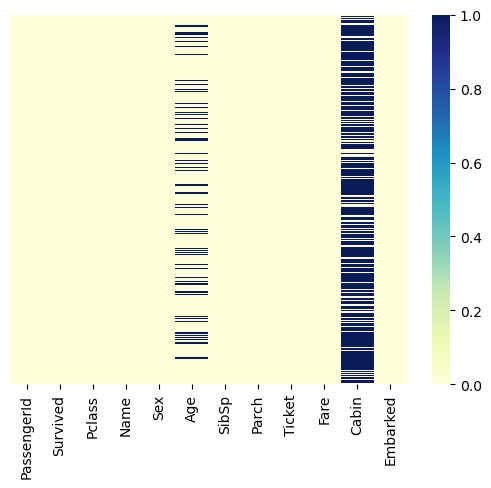

In [8]:
sns.heatmap(ds.isnull(),yticklabels=False,cmap="YlGnBu")

In [9]:
Sex = pd.get_dummies(ds['Sex'],drop_first=True)
SibSp = pd.get_dummies(ds['SibSp'],drop_first=True)
Embarked = pd.get_dummies(ds['Embarked'],drop_first=True)
Pclass  = pd.get_dummies(ds['Pclass'],drop_first=True)

In [10]:
for i in range(1,4):
    x = ds[ds['Pclass']== i]['Age'].dropna().mean()
    print(x)

38.233440860215055
29.87763005780347
25.14061971830986


In [11]:
import numpy
def set_age(row):
    
    Pclass = row[0]
    age = row[1]
    
    if numpy.isnan(age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
        
    else:
        return age

In [12]:
ds["Age"] = ds[  ["Pclass" ,"Age"] ].apply(set_age , axis=1)

<Axes: >

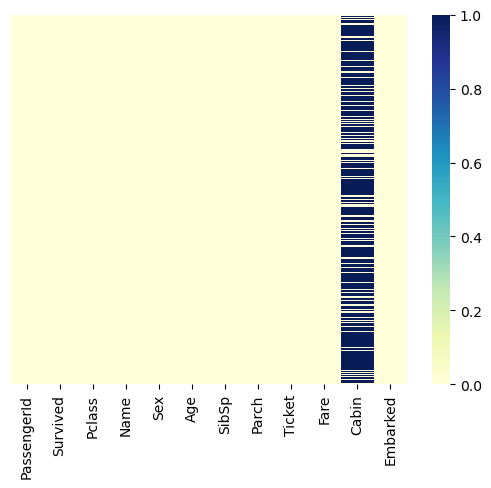

In [13]:
sns.heatmap(ds.isnull(),yticklabels=False,cmap="YlGnBu")

In [14]:
ds.drop(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex','SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],axis=1,inplace=True)

In [15]:
x = pd.concat( [ds , Pclass,Sex , SibSp , Embarked] , axis=1)

In [25]:
x.columns = x.columns.astype(str)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression()

In [31]:
model.fit(x_train,y_train)

LogisticRegression()

In [32]:
model.coef_

array([[-0.02775559, -0.62200338, -1.8831153 , -2.47348605,  0.14914756,
         0.06287817, -1.04701841, -0.66384495, -0.73792744, -1.06813077,
        -0.16242574, -0.53647042]])

In [33]:
model.intercept_

array([3.36209245])

In [38]:
y_pred = model.predict(x_test)

In [36]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [37]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_pred,y_test)

array([[90, 19],
       [15, 55]], dtype=int64)

In [40]:
(90+55)/(90+55+15+19)

0.8100558659217877